In [1]:
from networks import *
from simulation import *
from display import *
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

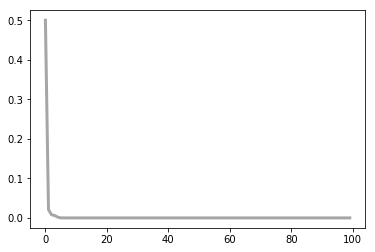

In [3]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .05, time_steps=100)
plot_all_time_steps(data)

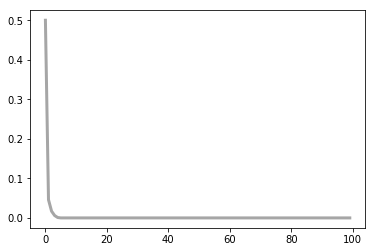

In [4]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .10, time_steps=100)
plot_all_time_steps(data)

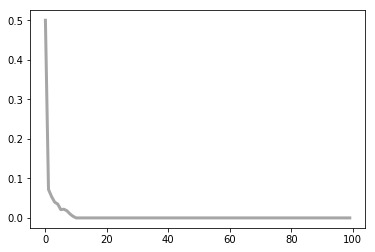

In [5]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .15, time_steps=100)
plot_all_time_steps(data)

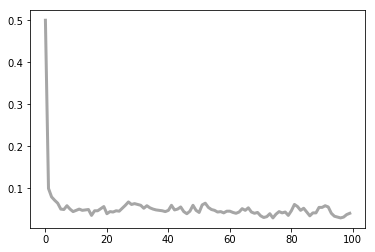

In [6]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .20, time_steps=100)
plot_all_time_steps(data)

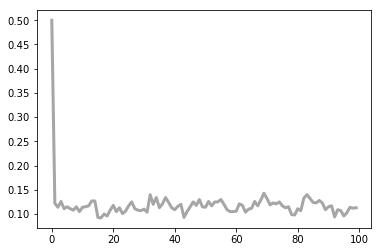

In [7]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .25, time_steps=100)
plot_all_time_steps(data)

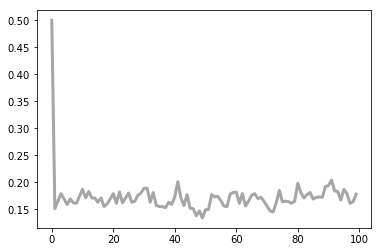

In [8]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .30, time_steps=100)
plot_all_time_steps(data)

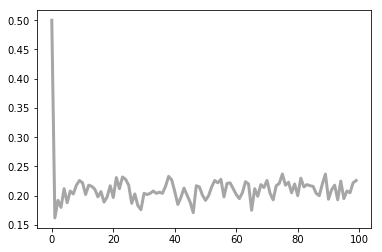

In [10]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .35, time_steps=100)
plot_all_time_steps(data)

In [10]:

lambdas_plan = {
    1e3 : np.linspace(1/12, 1/8, 5),
    5e3 : np.linspace(1/15, 1/10, 3),
    1e4 : np.linspace(1/17, 1/12, 2),
    5e4 : np.linspace(1/18, 1/15, 2),
    8.5e4 : np.linspace(1/20, 1/19, 2),
#     8.5e4 : [1/20]
}

# graphs = {}
# for size in lambdas_plan.keys():
#     print('starting size: ', size)
#     g = gen_WS_graph(int(size), 6, 0.5)
#     graphs[size] = g


In [4]:
import pickle
    
# pickle.dump(graphs, open('WS_2.pickle', 'wb'))

In [3]:
import pickle
graphs = pickle.load(open('WS.pickle', 'rb'))
print(graphs)

{1000.0: <networkx.classes.graph.Graph object at 0x7fab990ff0b8>, 5000.0: <networkx.classes.graph.Graph object at 0x7fab990ff208>, 10000.0: <networkx.classes.graph.Graph object at 0x7fab990ff0f0>, 50000.0: <networkx.classes.graph.Graph object at 0x7faba4a47be0>, 85000.0: <networkx.classes.graph.Graph object at 0x7faba4a47898>}


In [11]:
data = {}
for size in lambdas_plan.keys():
    for lam in lambdas_plan[size]:
        data[(size, lam)] = []
        for trial in range(10):
            data[(size, lam)].append(run_SIS_simulation(graphs[size], lam, time_steps=100)[-1])
            print(data[(size,lam)])
        data[(size, lam)] = np.mean(data[(size, lam)])

KeyError: 1000.0

{(1000.0, 0.083333333333333329): 0.0, (1000.0, 0.09375): 0.0, (1000.0, 0.10416666666666666): 0.0, (1000.0, 0.11458333333333333): 0.0, (1000.0, 0.125): 0.0, (5000.0, 0.066666666666666666): 0.0, (5000.0, 0.083333333333333343): 0.0, (5000.0, 0.10000000000000001): 0.0, (10000.0, 0.058823529411764705): 0.0, (10000.0, 0.083333333333333329): 0.0, (50000.0, 0.055555555555555552): 0.0, (50000.0, 0.066666666666666666): 0.0, (85000.0, 0.05): 0.0}


/home/slyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/slyu/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


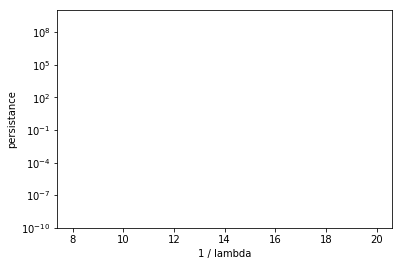

In [20]:
print(data)
plottable_data = {}
for size, lam in data:
    plottable_data[size] = plottable_data.get(size, []) + [(1.0/lam, data[(size, lam)])]
    
# plot a fit
all_xs = []
all_ys = []
for values in plottable_data.values():
    xs, ys = zip(*values)
    all_xs.extend(xs)
    all_ys.extend(ys)
    
a, c = np.polyfit(all_xs, np.log(all_ys), 1)
fit_xs = np.linspace(8, 20, 100)
fit_ys = np.exp(a * fit_xs + c)
thinkplot.plot(fit_xs, fit_ys, style='--', linewidth=1, color=(.4,.4,.4), alpha=1.0)


# plot a 
shapes = ['o', '+', 's', 'x', 'v', '.']
colors = [(1., 0., 0.), (1., .5, 0.), (.5, 1., 0.), (0., 1., 0.), (0., .9, .9)]

for size, shape, color in zip(plottable_data, shapes, colors):
    xs, ys = zip(*plottable_data[size])
    thinkplot.plot(xs, ys, style='^', color=color, markersize=10, alpha=1.0)
    

thinkplot.config(ylim=[1e-10, 1e10], yscale='log', xlabel='1 / lambda', ylabel='persistance')
